# 개요

In [1]:
# 기계 예측 유지보수 분류 데이터셋

# 일반적으로 실제 예측 유지보수 데이터셋은 구하기 어렵기 때문에, 우리는 실제 예측 유지보수 인조 데이터셋을 

In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [3]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 한글 폰트 불러오기
plt.rc('font', family='NanumBarunGothic')

In [5]:
df = pd.read_csv('/content/ai4i2020.csv')

In [6]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
# 개요 및 null값 확인
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [9]:
df.isnull().value_counts()

UDI    Product ID  Type   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF    HDF    PWF    OSF    RNF  
False  False       False  False                False                    False                   False        False            False            False  False  False  False  False    10000
dtype: int64

In [10]:
# 전처리
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [11]:
# 켈빈(K) 온도에서 섭씨(C) 온도로
df['Air temperature'] = df['Air temperature'] - 273.15
df['Process temperature'] = df['Process temperature'] - 273.15
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0


In [12]:
# 한글화
df.rename(columns={'UDI':'고유 식별자',
                   'Product ID':'제품 ID',
                   'Type':'제품 유형',
                   'Air temperature':'기온',
                   'Process temperature':'공정 온도',
                   'Rotational speed':'회전 속도',
                   'Torque':'Torque',
                   'Tool wear':'공구 마모',
                   'Machine failure':'실패 여부',
                   'TWF':'실패 요인 : 공구 마모',
                   'HDF':'실패 요인 : 열 방산',
                   'PWF':'실패 요인 : 전력 이상',
                   'OSF':'실패 요인 : 제품 변형',
                   'RNF':'실패 요인 : 알 수 없음'},inplace=True)
df

,고유 식별자,제품 ID,제품 유형,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0


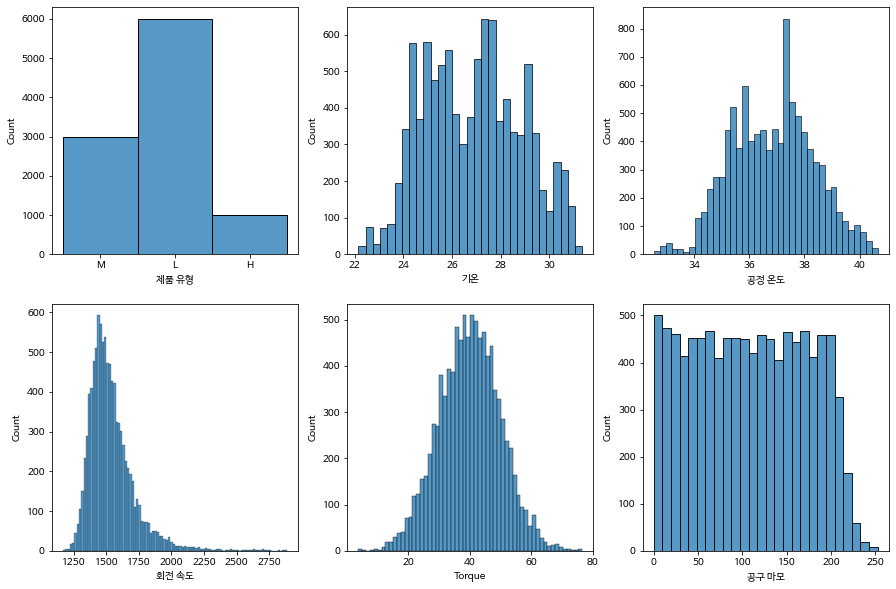

In [13]:
# 변인 분포 시각화
fig = plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

sns.histplot(df['제품 유형'],ax=ax1)
sns.histplot(df['기온'],ax=ax2)
sns.histplot(df['공정 온도'],ax=ax3)
sns.histplot(df['회전 속도'],ax=ax4)
sns.histplot(df['Torque'],ax=ax5)
sns.histplot(df['공구 마모'],ax=ax6)

plt.show()

In [14]:
# 해석

# 제품 유형은 대략 L이 60%, M이 30%, H가 10% 정도 분포한다.
# 기온, 공정 온도, 회전 속도, Torque는 대략 정규 분포를 따르고 있다.
# 공구 마모는 고른 분포를 띄고 있다.

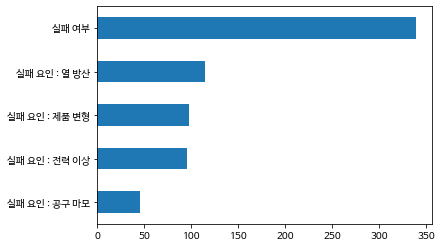

In [37]:
df[['실패 여부', '실패 요인 : 공구 마모', '실패 요인 : 열 방산', '실패 요인 : 전력 이상', '실패 요인 : 제품 변형']].sum().sort_values().plot(kind='barh')

In [ ]:
# 부가 설명

# '실패 요인 : 알 수 없음'은 '실패 여부'의 값에 포함되지 않는다.

# 분석

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


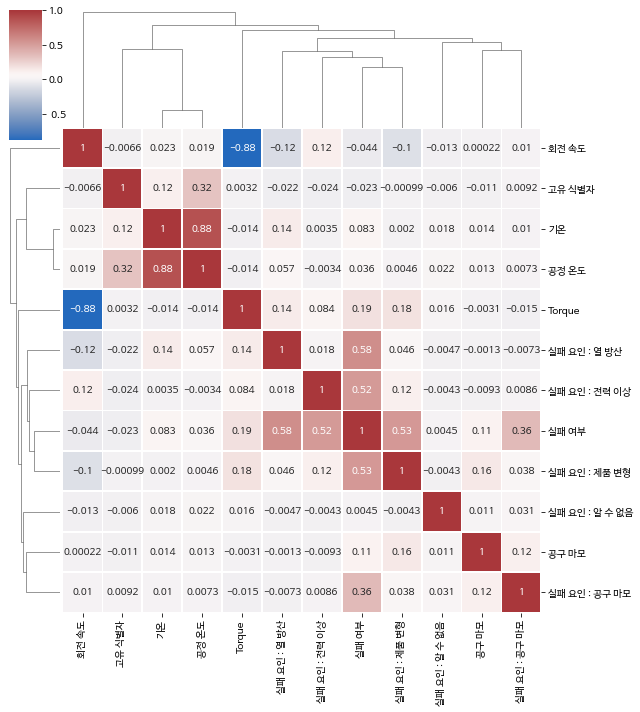

In [15]:
# 변인들 간의 상관관계
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [16]:
# 해석

# 기온과 공정 온도 사이에는 양의 상관관계가 있다.
# 회전속도와 Torque 사이에는 음의 상관관계가 있다.

In [17]:
# Type과 Machine Failure 상관관계 비교
df['제품 유형'].value_counts()

L    6000
M    2997
H    1003
Name: 제품 유형, dtype: int64

In [18]:
df[df['실패 여부']==1]['제품 유형'].value_counts()

L    235
M     83
H     21
Name: 제품 유형, dtype: int64

Text(0.5, 1.0, '제품 유형')

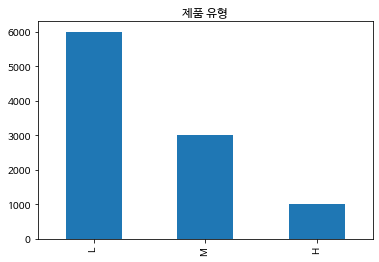

In [19]:
df['제품 유형'].value_counts().plot.bar()
plt.title('제품 유형')

Text(0.5, 1.0, '실패 제품 유형')

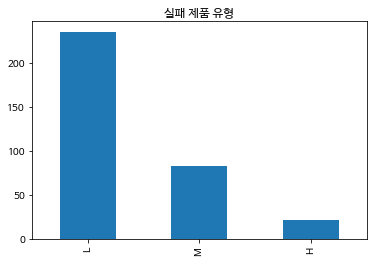

In [20]:
df[df['실패 여부']==1]['제품 유형'].value_counts().plot.bar()
plt.title('실패 제품 유형')

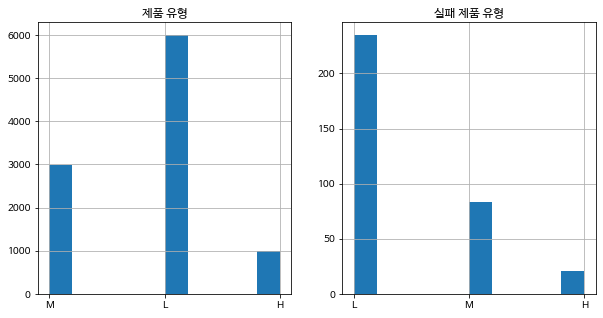

In [21]:
# 두 개의 서브플롯 생성
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 서브플롯에 대한 히스토그램 그리기
df['제품 유형'].hist(ax=axs[0])
axs[0].set_title('제품 유형')

# 두 번째 서브플롯에 대한 히스토그램 그리기
df[df['실패 여부']==1]['제품 유형'].hist(ax=axs[1])
axs[1].set_title('실패 제품 유형')

plt.show()

In [22]:
# Air Temperature와 HDF 상관관계 비교
df['기온'].mean()

26.85493000000002

In [23]:
df[df['실패 요인 : 열 방산']==1]['기온'].mean()

29.410869565217414

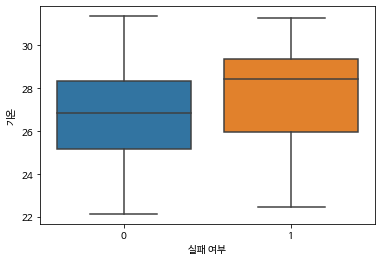

In [24]:
sns.boxplot(x="실패 여부", y="기온", data=df)

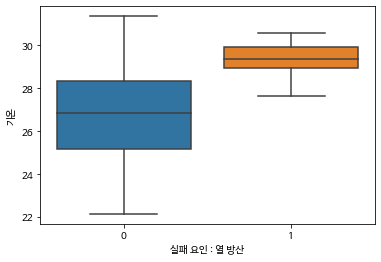

In [25]:
sns.boxplot(x="실패 요인 : 열 방산", y="기온", data=df)

Text(0.5, 1.0, '회전 속도와 전력 이상 요인과의 관계')

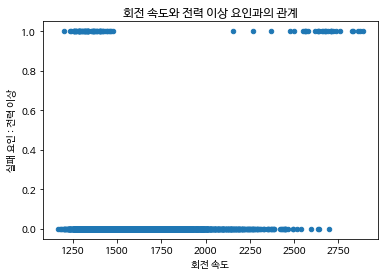

In [26]:
# Rotational speed와 PWF의 상관관계
df.plot(x='회전 속도', y='실패 요인 : 전력 이상', kind='scatter')
plt.title('회전 속도와 전력 이상 요인과의 관계')

Text(0.5, 1.0, 'Torque와 전력 이상 요인과의 관계')

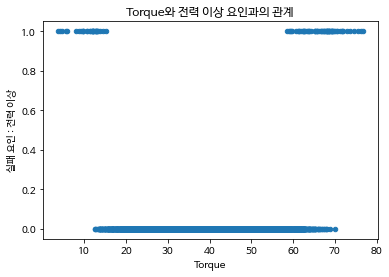

In [27]:
# Torque와 PWF의 상관관계
df.plot(x='Torque', y='실패 요인 : 전력 이상', kind='scatter')
plt.title('Torque와 전력 이상 요인과의 관계')

In [28]:
# Tool wear와 TWF의 상관관계
df['공구 마모'].mean()

107.951

In [29]:
df[df['실패 요인 : 공구 마모']==1]['공구 마모'].mean()

216.3695652173913

In [30]:
df

,고유 식별자,제품 ID,제품 유형,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0


In [31]:
# 전반적인 해석

# 1. 제품 유형 중에는 상대적인 비율로는 H는 실패가 적고, L이 실패가 많다.

# 2. 일반적인 기온의 평균보다 열 방산에 의한 실패가 나타났을 때의 기온의 평균이 더 높게 나타났다. (즉, 기온이 높을 수록 열 방산에 의한 실패 확률이 늘어나는 듯 보인다.)

# 3. 그래프를 볼 때, 회전속도나 Torque가 극단값에 있을 때 주로 전력 이상에 의한 실패가 나타나는 듯 보인다.

# 4. 공구 마모에 의한 실패는 절대적이다.

In [32]:
df.corr( ) 

,고유 식별자,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
고유 식별자,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
기온,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
공정 온도,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
회전 속도,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
공구 마모,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
실패 여부,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
실패 요인 : 공구 마모,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
실패 요인 : 열 방산,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
실패 요인 : 전력 이상,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


In [33]:
df

,고유 식별자,제품 ID,제품 유형,기온,공정 온도,회전 속도,Torque,공구 마모,실패 여부,실패 요인 : 공구 마모,실패 요인 : 열 방산,실패 요인 : 전력 이상,실패 요인 : 제품 변형,실패 요인 : 알 수 없음
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,25.65,35.25,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,25.75,35.25,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,25.85,35.45,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,25.85,35.55,1408,48.5,25,0,0,0,0,0,0
